In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import re
import scipy
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mac_antont/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,ID,url,title,label
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,ID,url,title
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ..."
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ..."
4,135313,2gis.ru,67


<h1>Работа с данными

In [4]:
train_df.title = train_df.title.apply(lambda x: str(x))
test_df.title = test_df.title.apply(lambda x: str(x))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135309 entries, 0 to 135308
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      135309 non-null  int64 
 1   url     135309 non-null  object
 2   title   135309 non-null  object
 3   label   135309 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.1+ MB


Проверим выборку на дубликаты

In [5]:
train_df = train_df.drop_duplicates(["url", "title", "label"])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130516 entries, 0 to 135308
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      130516 non-null  int64 
 1   url     130516 non-null  object
 2   title   130516 non-null  object
 3   label   130516 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.0+ MB


Удалили почти 5000 дубликатов

<Axes: xlabel='label', ylabel='count'>

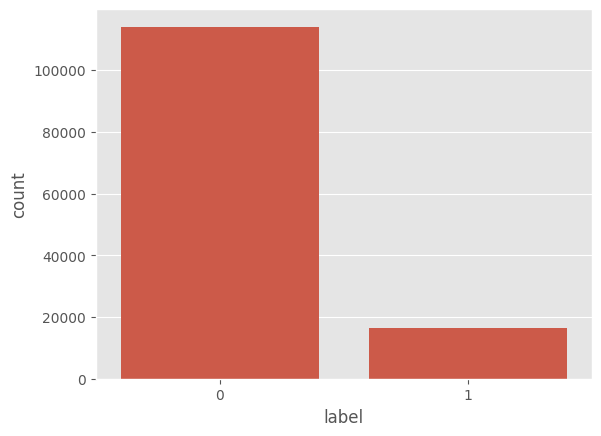

In [6]:
sns.countplot(x='label', data=train_df)

Сайтов с отметкой 18+ в разы больше, чем без. Имеем плохо сбалансированную выборку

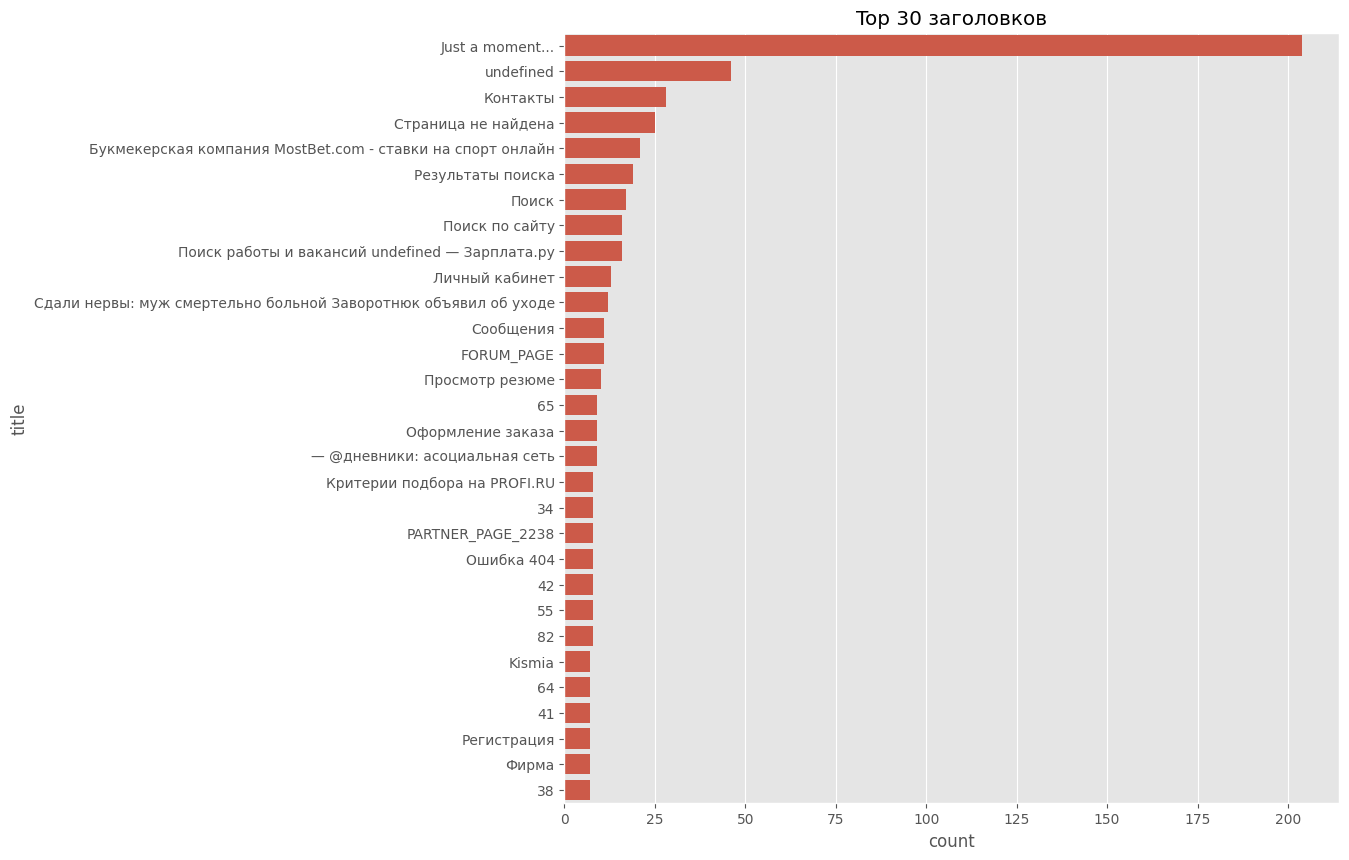

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(y='title', data=train_df, order=train_df['title'].value_counts().iloc[:30].index)
plt.title('Top 30 заголовков')
plt.show()

Много сайтов с заголовком Just a moment... , undefined и страница не найдена, которые не несут в себе полезной информации

In [8]:
def analyse_title(text):
    mask_title = train_df.title == text
    print(train_df[['url', 'title', 'label']][mask_title])
    sns.countplot(x='label', data=train_df[mask_title])
    plt.title(f"Распределение label title == '{text}'")
    plt.show()

                                url             title  label
1019                     dvemlbx.tk  Just a moment...      0
1098    ejekniwu.a271eea9.luxoze.pw  Just a moment...      0
1266                  ytiwusezir.ml  Just a moment...      0
2005          kocuw.bahamaon.ru.net  Just a moment...      0
2787                  qozydabasi.ga  Just a moment...      0
...                             ...               ...    ...
133706                   utnrvfa.tk  Just a moment...      0
133714                   rsslpuo.tk  Just a moment...      0
134556           liwy.xehavo.ru.net  Just a moment...      0
134682  nisoam.vincensax.kembra.icu  Just a moment...      0
135171                   tjhucet.tk  Just a moment...      0

[204 rows x 3 columns]


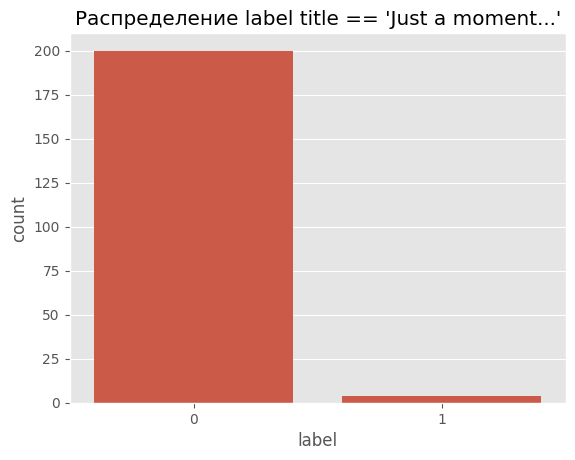

In [9]:
analyse_title('Just a moment...')

                                         url      title  label
5769                          sex.missfit.ru  undefined      1
6429                              www.pnp.ru  undefined      0
7019                         appleinsider.ru  undefined      0
9839                             hightech.fm  undefined      0
11727                          gazeta.a42.ru  undefined      0
13284                          gazeta.spb.ru  undefined      0
13530                               povar.ru  undefined      0
14594                       www.metronews.ru  undefined      0
18142                         gorlovka.today  undefined      0
19798                              reform.by  undefined      0
20698                               gmbox.ru  undefined      0
24102                           ladyelena.ru  undefined      0
24844         xn----7sbbncec2cn3hzb.xn--p1ai  undefined      0
27510                         mozgokratia.ru  undefined      0
29703                               7days.ru  undefined

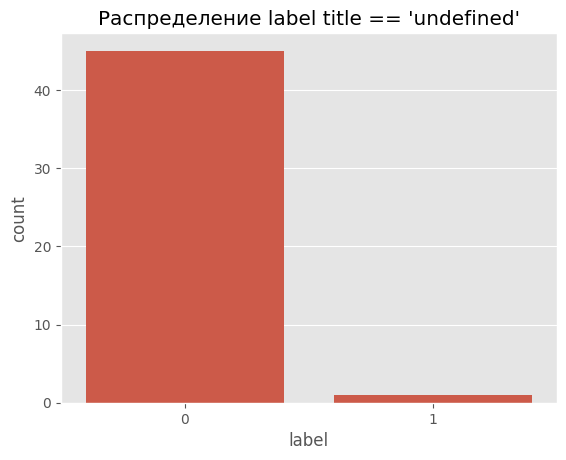

In [10]:
analyse_title('undefined')

                                              url                title  label
4449                                    rutube.ru  Страница не найдена      0
12539                                  www.ivi.ru  Страница не найдена      0
20100                                  sushica.ru  Страница не найдена      0
22269                               www.sports.ru  Страница не найдена      0
33743                              open-broker.ru  Страница не найдена      0
39119                            www.sima-land.ru  Страница не найдена      0
40536                                  euroset.ru  Страница не найдена      0
45684                                  m.somon.tj  Страница не найдена      0
54866   xn----7sbnzl7ae5f.xn--h1aagk2bza.xn--p1ai  Страница не найдена      0
61836                                mahabazar.ru  Страница не найдена      0
62930                                   zvooq.pro  Страница не найдена      0
77582                                 soundpro.by  Страница не н

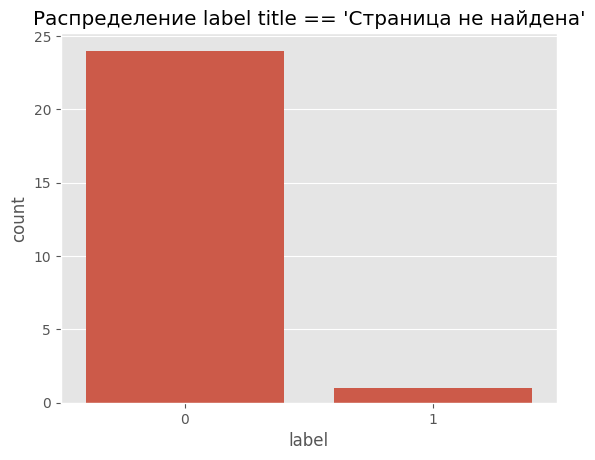

In [11]:
analyse_title('Страница не найдена')

Как видно, классифицировать сайты нужно с учетом url, так как заголовок далеко не всегда содержит полезную информацию

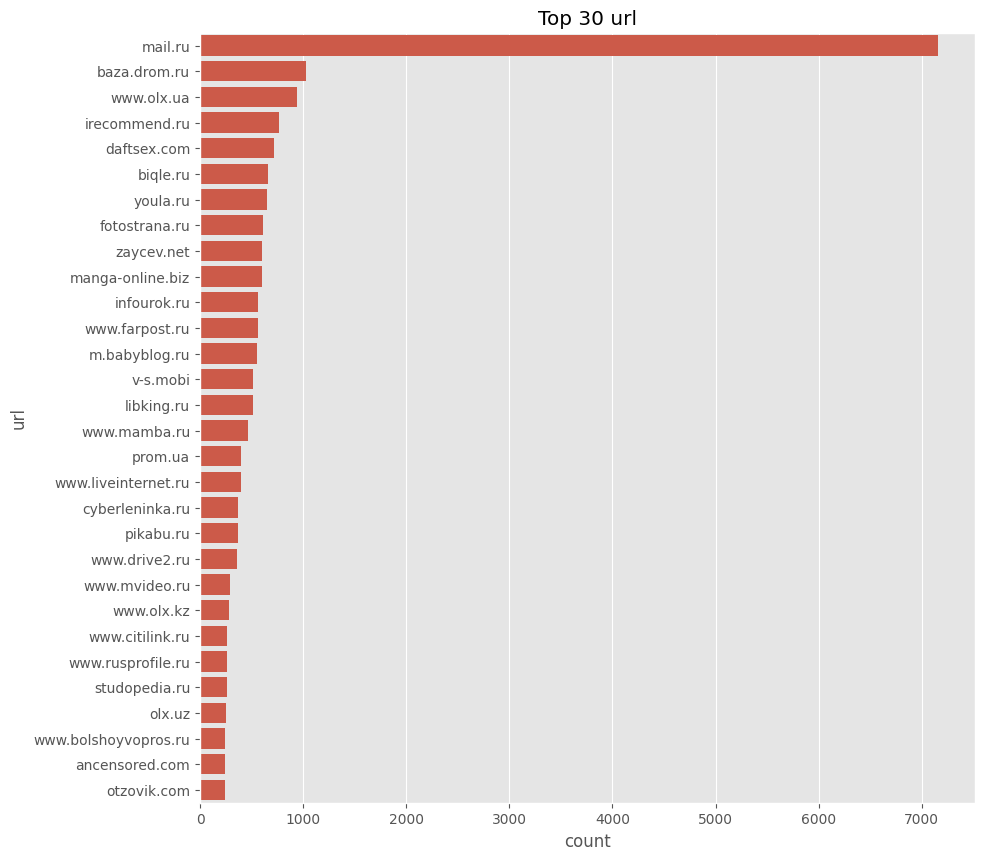

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(y='url', data=train_df, order=train_df['url'].value_counts().iloc[:30].index)
plt.title('Top 30 url')
plt.show()

<Axes: xlabel='label', ylabel='count'>

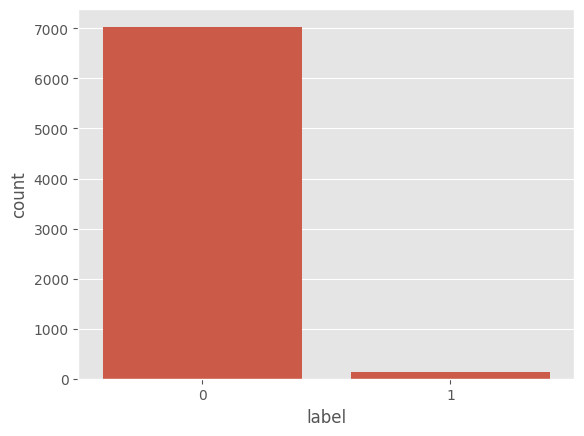

In [13]:
sns.countplot(x='label', data=train_df[train_df.url == 'mail.ru'])

Из безобидного url не следует label == 0
Значит бдуем использовать для классиификации и ссылку и заголовок

Посмотрим на заголовки сайтов с label == 1

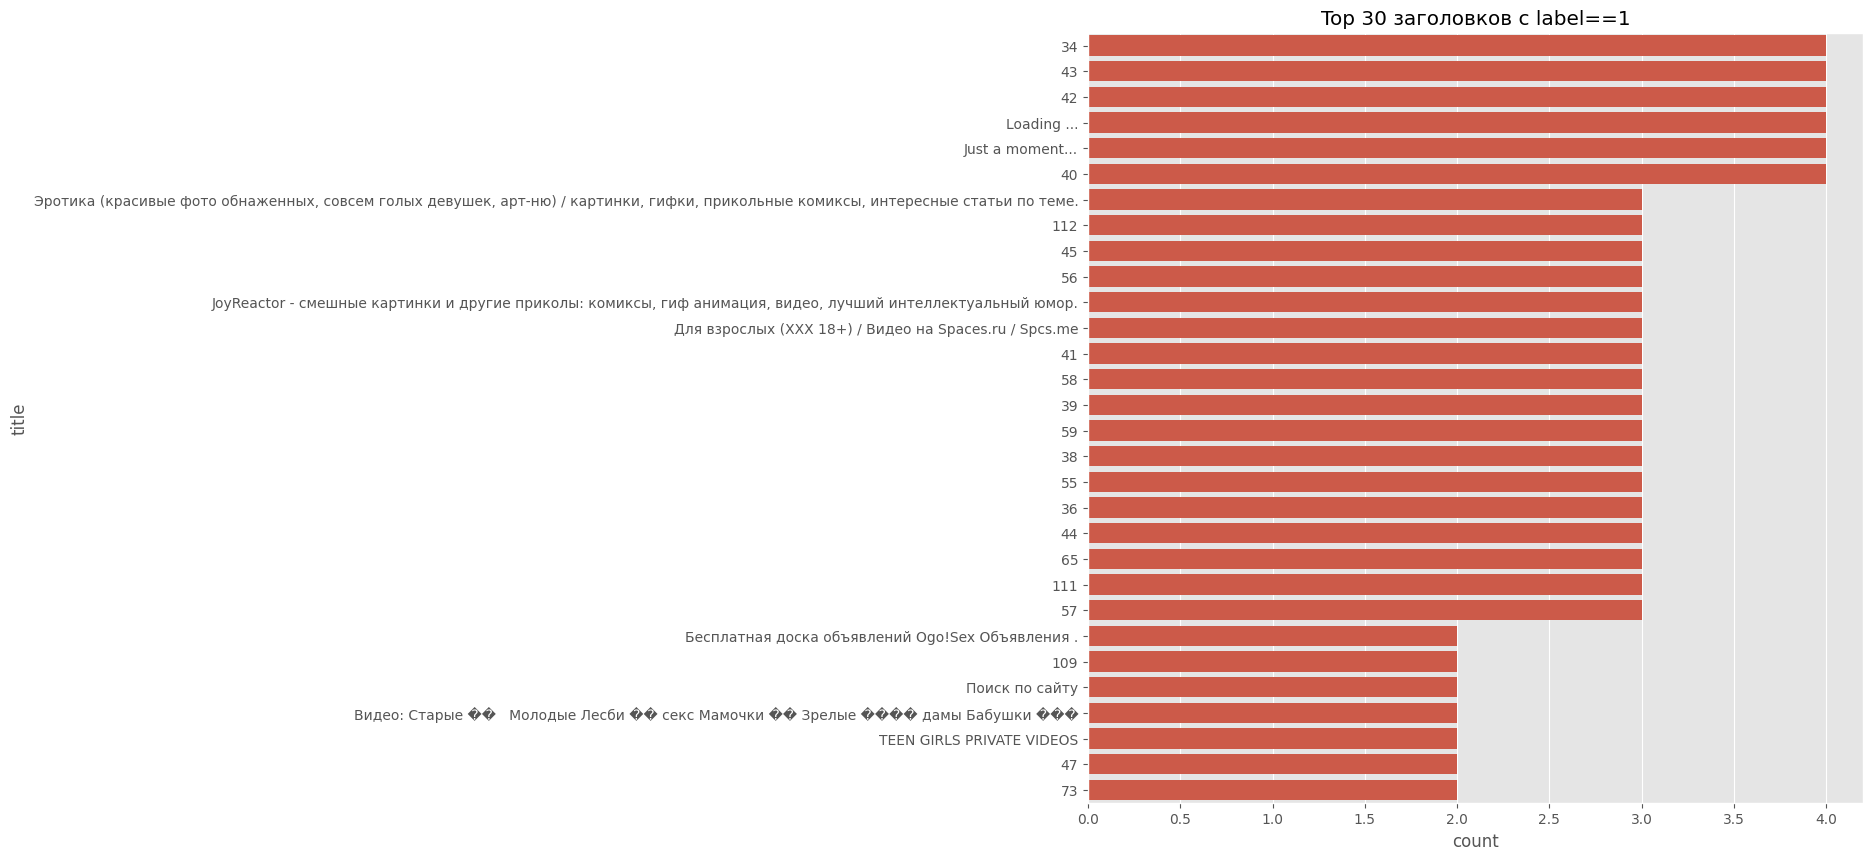

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(y='title', data=train_df[train_df.label==1], order=train_df['title'][train_df.label==1].value_counts().iloc[:30].index)
plt.title('Top 30 заголовков c label==1')
plt.show()

В дата сете много заголовков, состоящих только из чисел. Такие заголовки учитывать при обработке не будем, будем брать только url

<Axes: xlabel='label', ylabel='count'>

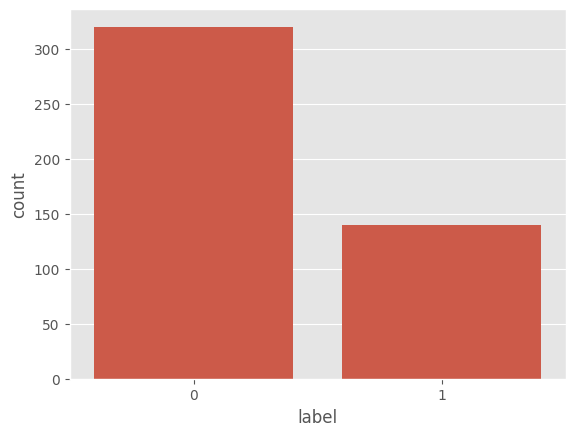

In [15]:
sns.countplot(x='label', data=train_df[train_df.title.str.contains(r'^\d+$')])

Итак, в результате анализа имеющейся выборки мы сделали вывод, что нужно учитывать и url и title сайта.
Не будем учитывать title, состоящие только из числа.
Добавим в стоп слова часто встречающиеся неинформативыне слова из url (например ru, www ...)
Так же уберем из выборки строки с title 'Just a moment...', 'undefined', 'Страница не найдена' и label == 0, так как таких сайтов относительно много и они зашумляют выборку

In [16]:
mask1 = train_df.title == 'Just a moment...'
mask2 = train_df.title == 'undefined' 
mask3 = train_df.title == 'Страница не найдена' 
mask4 = train_df.label == 0
train_df = train_df.loc[(mask1 | mask2 | mask3) & mask4 == False]

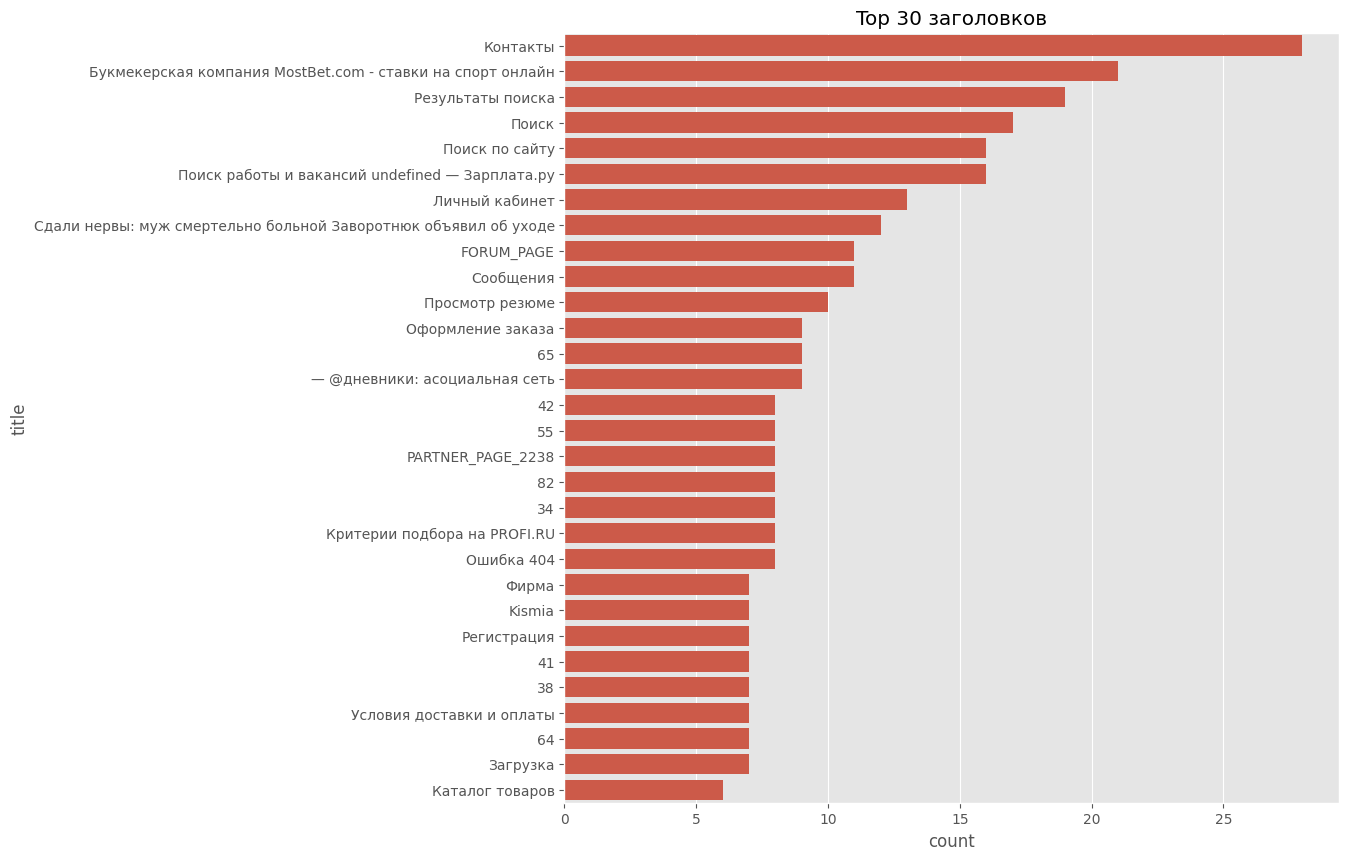

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(y='title', data=train_df, order=train_df['title'].value_counts().iloc[:30].index)
plt.title('Top 30 заголовков')
plt.show()

In [18]:
stop_words = nltk.corpus.stopwords.words('russian')
stop_words += nltk.corpus.stopwords.words('english')
stop_words.extend(['www', 'com', 'net', 'kz', 'ua', 'net', 'pro', 'tv', 'eu', 'org'])

<h1>Анализ моделей

In [19]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_plot(y_pred, y_true):
    sns.heatmap(confusion_matrix(y_true, y_pred), 
                annot=True,
                fmt='g', 
                xticklabels=['0', '1'],
                yticklabels=['0', '1'])
    plt.ylabel('Prediction', fontsize=13)
    plt.xlabel('Actual', fontsize=13)
    plt.title('Confusion Matrix', fontsize=17)
    plt.show()

In [20]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
   
    plt.figure(figsize=(15, 5))
    colors = ["blue" if c < 0 else "red" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

<h2>Логистическая регрессия

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

count_log = Pipeline([
    (
        'vectorizer',
        CountVectorizer(
            lowercase=True, ngram_range=(1, 1), token_pattern="[a-zа-яё]+",
            stop_words=stop_words, min_df=3, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(random_state=21, loss='log_loss', class_weight='balanced'))
], verbose=True)

In [22]:
x_train = train_df.url.values + " " + train_df.title.values 
y_train = train_df.label.values 

x_test = test_df.url.values  + " " + test_df.title.values 

In [23]:
count_log.fit(x_train, y_train)
y_pred = count_log.predict(x_train)
f1_score(y_train, y_pred)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   1.7s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.3s


0.9739603810675941

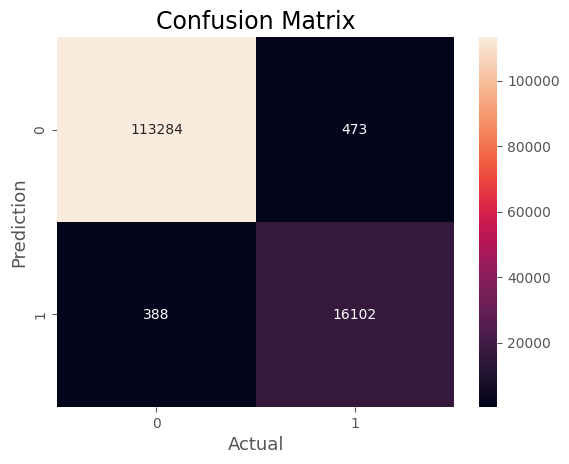

In [24]:
confusion_matrix_plot(y_pred, y_train)

In [25]:
pred = count_log.predict(x_test)
test_df["label"] = pred
test_df[["ID", "label"]].to_csv("out.csv", index=False)

Получили скор 0.964 <br/>
Попробуем с помощью GridSearchCV подобрать лучшие параметры векторайзера

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {'vectorizer__ngram_range':[(1, 1), (1, 2), (2, 3)],
             'vectorizer__min_df': [2, 3, 4, 5], 'vectorizer__max_df': [0.8, 0.85]}

clf = GridSearchCV(count_log, parameters, cv=3, n_jobs=-1, scoring='f1', verbose=2)
clf.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   3.8s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.3s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(max_df=0.8, min_df=3,
                                                        stop_words=['и', 'в',
                                                                    'во', 'не',
                                                                    'что', 'он',
                                                                    'на', 'я',
                                                                    'с', 'со',
                                                                    'как', 'а',
                                                                    'то', 'все',
                                                                    'она',
                                                                    'так',
                                                                    'его', 'но',
                                                                    'да', 'ты',
                                                                    'к', 'у',
                                                                    'же', 'вы',
                                                                    'за', 'бы',
                                                                    'по',
                                                                    'только',
                                                                    'ее', 'мне', ...],
                                                        token_pattern='[a-zа-яё]+')),
                                       ('clf',
                                        SGDClassifier(class_weight='balanced',
                                                      loss='log_loss',
                                                      random_state=21))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'vectorizer__max_df': [0.8, 0.85],
                         'vectorizer__min_df': [2, 3, 4, 5],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 3)]},
             scoring='f1', verbose=2)

In [28]:
f1_score(
    y_train,
    clf.best_estimator_.predict(x_train)
)

0.9799884956555962

In [29]:
best_parameters = clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	vectorizer__max_df: 0.8
	vectorizer__min_df: 2
	vectorizer__ngram_range: (1, 2)


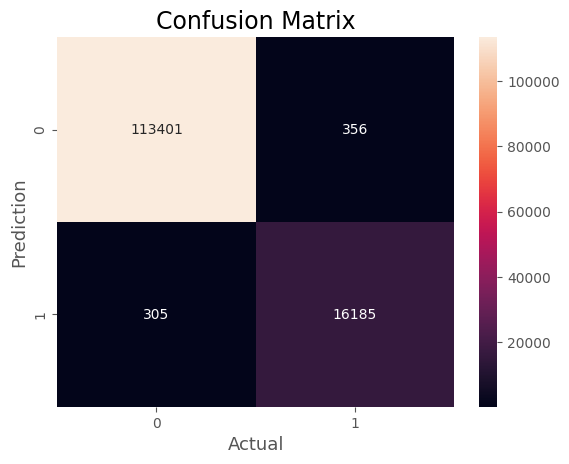

In [30]:
confusion_matrix_plot(clf.best_estimator_.predict(x_train), y_train)

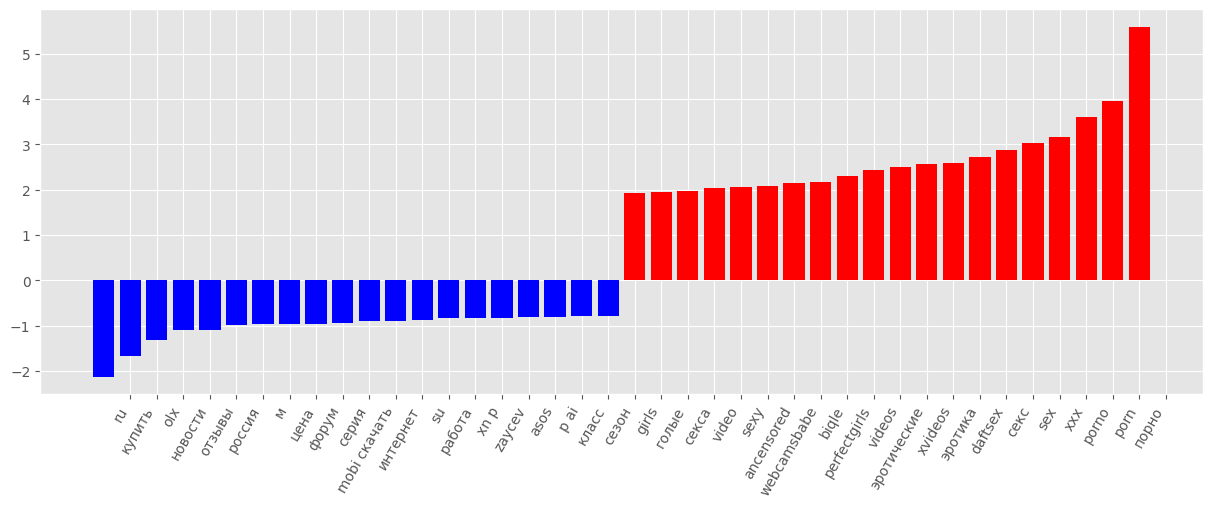

In [31]:
visualize_coefficients(clf.best_estimator_[1], clf.best_estimator_[0].get_feature_names_out(), n_top_features=20)

In [32]:
x_test = test_df.url.values  + " " + test_df.title.values 
pred = clf.predict(x_test)
test_df["label"] = pred
test_df[["ID", "label"]].to_csv("out.csv", index=False)

После грид серча получили скор 0.9655

In [33]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

def my_tokenizer(text):
    wnl = WordNetLemmatizer()
    stem = SnowballStemmer("russian")
    tokens = re.sub('[^a-zA-Zа-яА-ЯёЁ]', ' ', text)
    tokens = tokens.lower()
    tokens = tokens.split()
    tokens = [wnl.lemmatize(t) for t in tokens if t not in stop_words]
    tokens = [stem.stem(t) for t in tokens]
    return tokens

In [34]:
count_lem_log = Pipeline([
    (
        'vectorizer',
        CountVectorizer(tokenizer=my_tokenizer,
            ngram_range=(1, 2),
            min_df=2, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(random_state=21, loss='log_loss', class_weight='balanced'))
], verbose=True)

In [35]:
count_lem_log.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  48.3s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.4s


Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2),
                                 tokenizer=<function my_tokenizer at 0x13ed0a480>)),
                ('clf',
                 SGDClassifier(class_weight='balanced', loss='log_loss',
                               random_state=21))],
         verbose=True)

In [36]:
y_pred = count_lem_log.predict(x_train)
f1_score(
    y_train,
    y_pred
)

0.9795536226631633

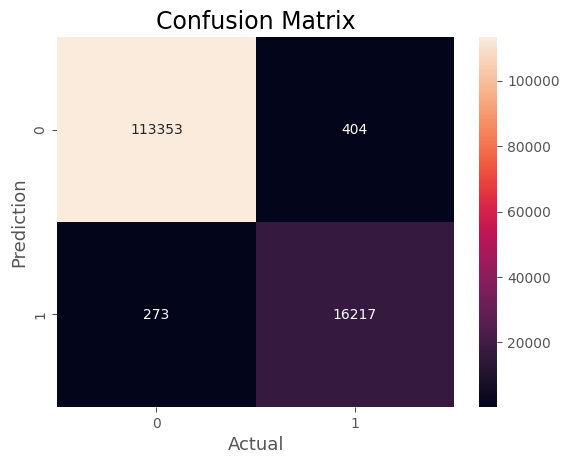

In [37]:
confusion_matrix_plot(y_pred, y_train)

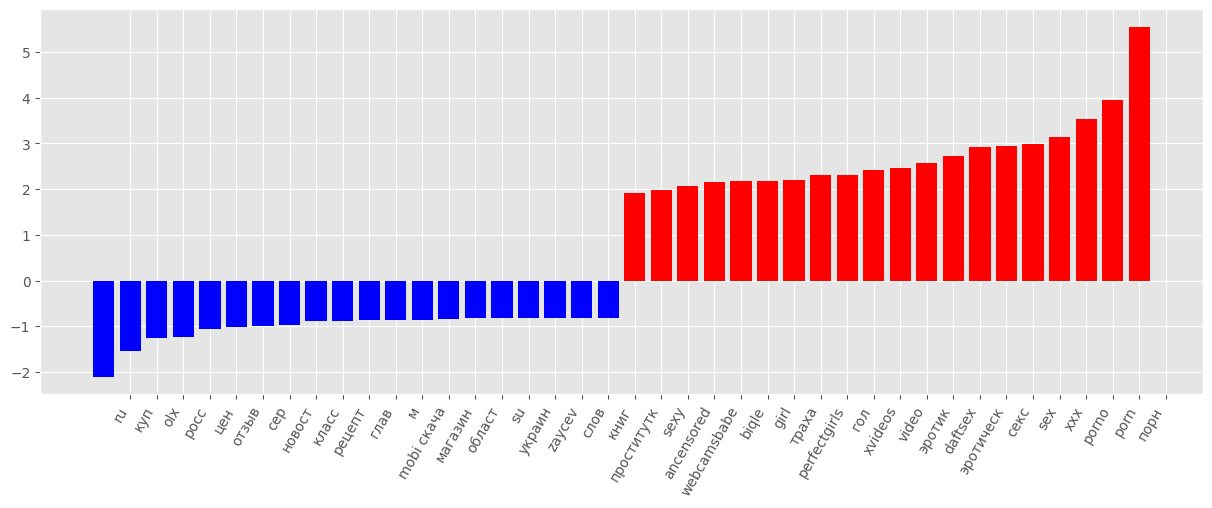

In [38]:
visualize_coefficients(count_lem_log[1], count_lem_log[0].get_feature_names_out(), n_top_features=20)

In [39]:
x_test = test_df.url.values  + " " + test_df.title.values 
pred = count_lem_log.predict(x_test)
test_df["label"] = pred
test_df[["ID", "label"]].to_csv("out.csv", index=False)

Добавив лемматизацию, получилось 0.968

Построим модель на нграмах символов

In [40]:
def preprocessor(text):
    whitespaced_text = re.sub("[^а-яёa-z]", ' ', text.lower())
    return re.sub(' +', ' ',  whitespaced_text)

In [41]:
char_count_log = Pipeline([
    (
        'vectorizer',
        CountVectorizer(
            ngram_range=(2, 4), analyzer='char',
            preprocessor=preprocessor, min_df=5, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(random_state=21, loss='log_loss', class_weight='balanced'))
], verbose=True)

In [42]:
char_count_log.fit(x_train, y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  18.3s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   2.8s


Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer='char', max_df=0.8, min_df=5,
                                 ngram_range=(2, 4),
                                 preprocessor=<function preprocessor at 0x148ccea20>)),
                ('clf',
                 SGDClassifier(class_weight='balanced', loss='log_loss',
                               random_state=21))],
         verbose=True)

In [43]:
f1_score(
    y_train,
    char_count_log.predict(x_train)
)

0.9984248152187083

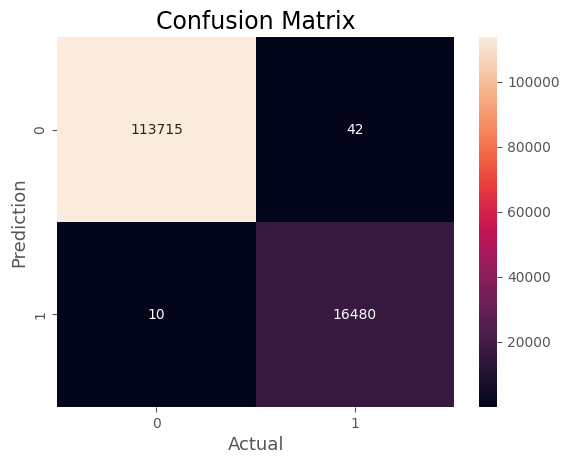

In [44]:
confusion_matrix_plot(char_count_log.predict(x_train), y_train)

In [45]:
x_test = test_df.url.values  + " " + test_df.title.values 
pred = char_count_log.predict(x_test)
test_df["label"] = pred
test_df[["ID", "label"]].to_csv("out.csv", index=False)

<h3>Модель на символах показала 0.981!

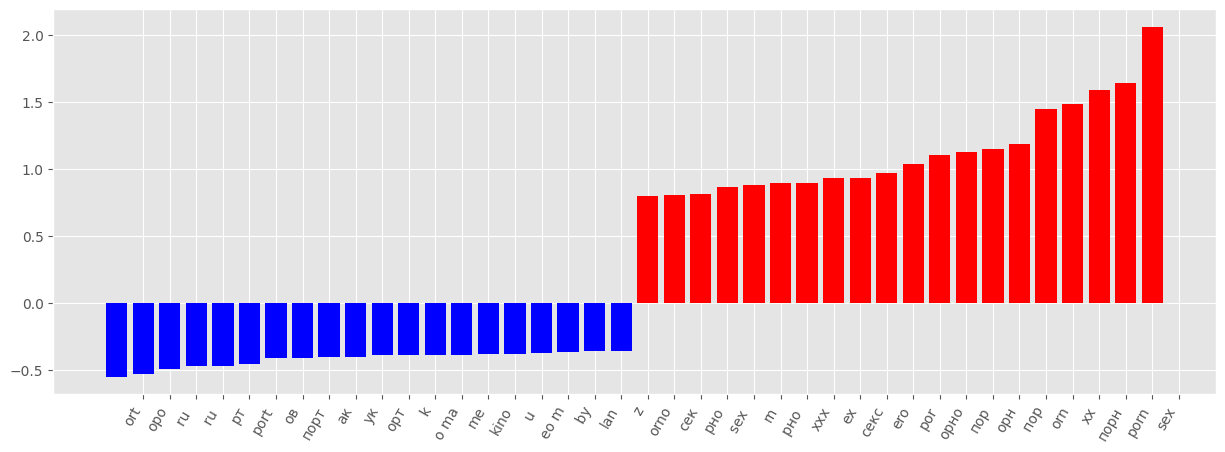

In [46]:
visualize_coefficients(char_count_log[1], char_count_log[0].get_feature_names_out(), n_top_features=20)

Слово ru имеет большой вес, однако из-за специфики выборок при удалении этого слова из словаря метрики ухудшаются

Попробуем применить tfidf к модели<br/>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
char_tfidf_log = Pipeline([
    (
        'vectorizer',
        TfidfVectorizer(
            ngram_range=(2, 4), analyzer='char',
            preprocessor=preprocessor, min_df=5, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(random_state=21, loss='log_loss', class_weight='balanced'))
])

In [49]:
parameters = {'vectorizer__ngram_range':[(2, 4), (1, 3)],
             'vectorizer__min_df': [5, 6], 'vectorizer__max_df': [0.8, 0.85]}

clf = GridSearchCV(char_tfidf_log, parameters, cv=3, n_jobs=-1, scoring='f1', verbose=2)
clf.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='char',
                                                        max_df=0.8, min_df=5,
                                                        ngram_range=(2, 4),
                                                        preprocessor=<function preprocessor at 0x148ccea20>)),
                                       ('clf',
                                        SGDClassifier(class_weight='balanced',
                                                      loss='log_loss',
                                                      random_state=21))]),
             n_jobs=-1,
             param_grid={'vectorizer__max_df': [0.8, 0.85],
                         'vectorizer__min_df': [5, 6],
                         'vectorizer__ngram_range': [(2, 4), (1, 3)]},
             scoring='f1', verbose=2)

In [50]:
f1_score(
    y_train,
    clf.predict(x_train)
)

0.962201988738469

In [51]:
best_parameters = clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	vectorizer__max_df: 0.8
	vectorizer__min_df: 5
	vectorizer__ngram_range: (2, 4)


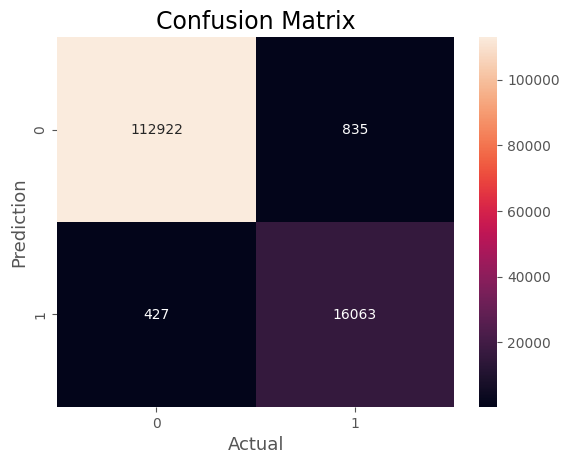

In [52]:
confusion_matrix_plot(clf.best_estimator_.predict(x_train), y_train)

Tf-idf не дало хорошего результата (

Попробуем применить ColumnTransformer

In [53]:
from sklearn.compose import ColumnTransformer

x_train = pd.DataFrame()
x_train['url'] = train_df['url']
x_train['title'] = train_df['title']

x_test = pd.DataFrame()
x_test['url'] = test_df['url']
x_test['title'] = test_df['title']

In [54]:
count_count_log = Pipeline([
    (
    'vectorizer', 
        ColumnTransformer([
            (
                'url', 
                CountVectorizer(
                    ngram_range=(2, 5), analyzer='char',
            preprocessor=preprocessor, min_df=5, max_df=0.8
                ), 
                'url'
            ),
            (
                'title',
                CountVectorizer(
                    ngram_range=(2, 5), analyzer='char',
            preprocessor=preprocessor, min_df=5, max_df=0.8
                ), 
                'title'
            )
        ])
    ),
    ('clf', SGDClassifier(random_state=42, loss='log_loss', class_weight='balanced'))
], verbose=True).fit(x_train, y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  28.5s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   3.3s


In [55]:
y_pred = count_count_log.predict(x_train)
f1_score(
    y_train,
    y_pred
)

0.999000030302112

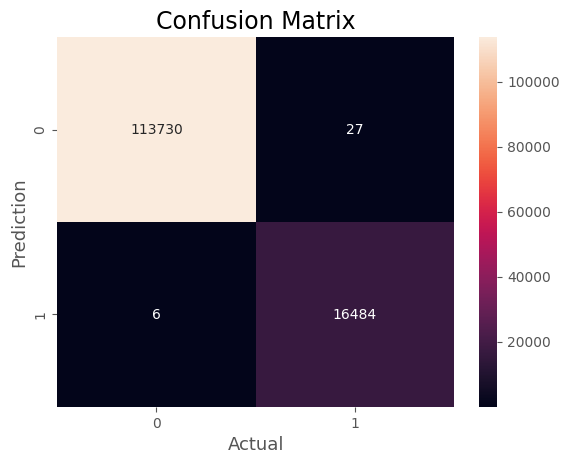

In [56]:
confusion_matrix_plot(y_pred, y_train)

In [57]:
test_df["label"] = count_count_log.predict(x_test)
test_df[["ID", "label"]].to_csv("out.csv", index=False)

<h3>Модель с такими параметрами дала наилучший результата 0.982

<h2>ComplementNB

In [58]:
from sklearn.naive_bayes import ComplementNB 

In [59]:
count_count_NB = Pipeline([
    (
    'vectorizer', 
        ColumnTransformer([
            (
                'url', 
                CountVectorizer(
                   lowercase=True, ngram_range=(1, 2), token_pattern="[a-zа-яё]+",
            stop_words=stop_words, min_df=2, max_df=0.8
                ), 
                'url'
            ),
            (
                'title',
                CountVectorizer(
                    lowercase=True, ngram_range=(1, 2), token_pattern="[a-zа-яё]+",
            stop_words=stop_words, min_df=2, max_df=0.8
                ), 
                'title'
            )
        ])
    ),
    ('clf', ComplementNB(alpha=0.00001))
], verbose=True).fit(x_train, y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   3.9s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s


In [60]:
y_pred = count_count_NB.predict(x_train)
f1_score(
    y_train,
    y_pred
)

0.9722115127969394

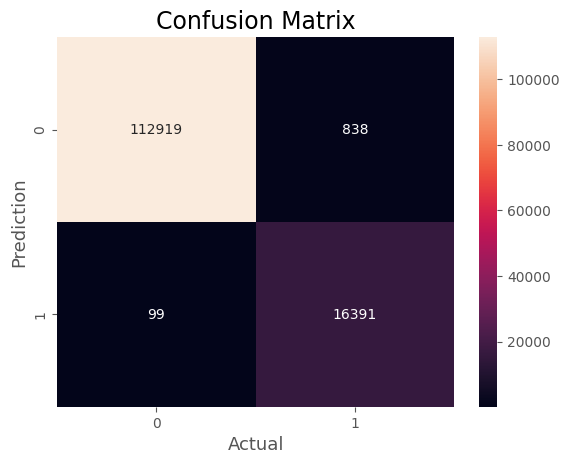

In [61]:
confusion_matrix_plot(y_pred, y_train)

In [62]:
test_df["label"] = count_count_NB.predict(x_test)
test_df[["ID", "label"]].to_csv("out.csv", index=False)

Наивные Байес показал неплохой результат (0.941) и удивил быстродействием

<h2>RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
count_count_forest = Pipeline([
    (
                'vectorizer', 
                CountVectorizer(
                   lowercase=True, ngram_range=(1, 2), token_pattern="[a-zа-яё]+",
            stop_words=stop_words, min_df=5, max_df=0.8
                )
    ), 
    ('clf', RandomForestClassifier(random_state=42, criterion='entropy', n_jobs=-1, class_weight='balanced_subsample',
                                   n_estimators=100, max_depth=1000))
], verbose=True)

In [65]:
x_train = train_df.url.values + " " + train_df.title.values 
y_train = train_df.label.values 

x_test = test_df.url.values  + " " + test_df.title.values 

In [66]:
count_count_forest.fit(x_train, y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   3.7s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  59.4s


Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2),
                                 stop_words=['и', 'в', 'во', 'не', 'что', 'он',
                                             'на', 'я', 'с', 'со', 'как', 'а',
                                             'то', 'все', 'она', 'так', 'его',
                                             'но', 'да', 'ты', 'к', 'у', 'же',
                                             'вы', 'за', 'бы', 'по', 'только',
                                             'ее', 'мне', ...],
                                 token_pattern='[a-zа-яё]+')),
                ('clf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', max_depth=1000,
                                        n_jobs=-1, random_state=42))],
         verbose=True)

In [67]:
y_pred = count_count_forest.predict(x_train)
f1_score(
    y_train,
    y_pred
)

0.9978150036416606

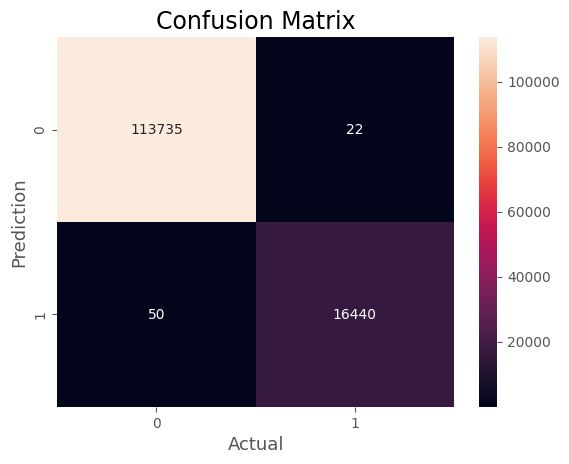

In [68]:
confusion_matrix_plot(y_pred, y_train)

In [69]:
test_df["label"] = count_count_forest.predict(x_test)
test_df[["ID", "label"]].to_csv("out.csv", index=False)

Рандом форест 0.961, возможно произошло переобучение.<br>
Логистическая регрессия показывает лучшие результаты

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
count_GB = Pipeline([
    (
                'vectorizer', 
                CountVectorizer(
                   lowercase=True, ngram_range=(1, 1), token_pattern="[a-zа-яё]+",
            stop_words=stop_words, min_df=5, max_df=0.5
                )
    ), 
    ('clf', GradientBoostingClassifier(n_estimators=400, max_depth=10, random_state=42, verbose=1, max_features='sqrt'))
])

In [76]:
count_GB.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7309           22.50s
         2           0.7172           19.86s
         3           0.7048           18.90s
         4           0.6852           17.97s
         5           0.6715           17.88s
         6           0.6489           18.11s
         7           0.6242           18.18s
         8           0.6166           18.35s
         9           0.6115           18.11s
        10           0.6046           17.86s
        20           0.5139           17.16s
        30           0.4666           16.60s
        40           0.4092           16.09s
        50           0.3800           15.54s
        60           0.3529           15.11s
        70           0.3186           14.61s
        80           0.2905           14.12s
        90           0.2712           13.66s
       100           0.2557           13.14s
       200           0.1610            8.59s
       300           0.1163            4.28s
       40

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.5, min_df=5,
                                 stop_words=['и', 'в', 'во', 'не', 'что', 'он',
                                             'на', 'я', 'с', 'со', 'как', 'а',
                                             'то', 'все', 'она', 'так', 'его',
                                             'но', 'да', 'ты', 'к', 'у', 'же',
                                             'вы', 'за', 'бы', 'по', 'только',
                                             'ее', 'мне', ...],
                                 token_pattern='[a-zа-яё]+')),
                ('clf',
                 GradientBoostingClassifier(max_depth=10, max_features='sqrt',
                                            n_estimators=400, random_state=42,
                                            verbose=1))])

In [77]:
y_pred = count_GB.predict(x_train)
f1_score(
    y_train,
    y_pred
)

0.9591277219298522

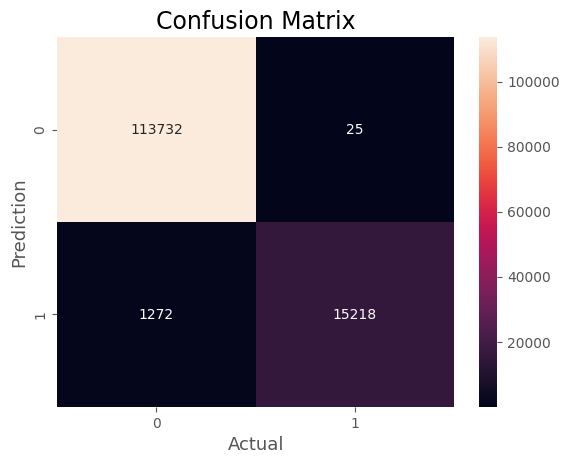

In [78]:
confusion_matrix_plot(y_pred, y_train)

В градиентном бустинге нету функции для баланса классов, он делает перевес предсказаний